# Part II - Bike Data Analysis
## by Hastings Sibanda

## Investigation Overview
The Age and Gender profiles of clients was investigated. Generally, the majority of trips were taken by people in their 20s and 30s. Although there were notable riders in their 50s, and 60s. Outliers were also noted with the oldest recorded being 141 years old, which is very odd. Males dominated in trips, making up over 3 times more trips taken than Females. I also investigated time series data to show that most trips were taken during weekdays than on weekends. 


## Dataset Overview

The dataset contained more than 170,000 rows of trip information for trips taken in February 2019 in the San Francisco Bay Area. Columns included member_age, trip_duration and trip_start_time.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_clean = pd.read_csv("bike_clean.csv")

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Gender Profile

The bulk of the trips were taken by Males who embarked on about 3 times more trips than Females, with the Other gender type having taken the least number of trips.

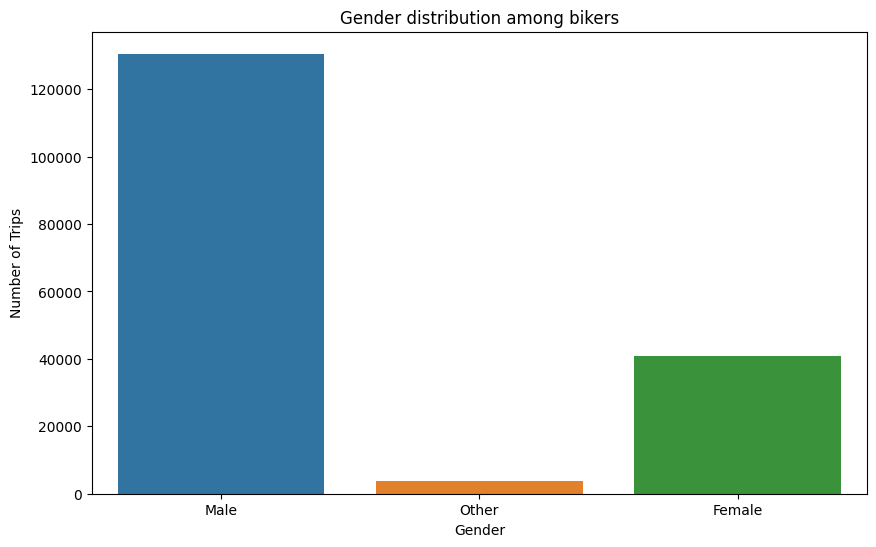

In [3]:
plt.figure(figsize=(10,6))
sns.countplot(
    data = bike_clean,
    x = 'member_gender'
);
plt.title("Gender distribution among bikers");
plt.xlabel("Gender");
plt.ylabel("Number of Trips");

## Age Profile

Most of the riders were in their 20s and 30s. This makes sense because it is the age at which the normal human being is most physically active. However, some notable riders in their 50s and 60s. Whilst there a few odd outliers, the oldest being aged 141 years old.

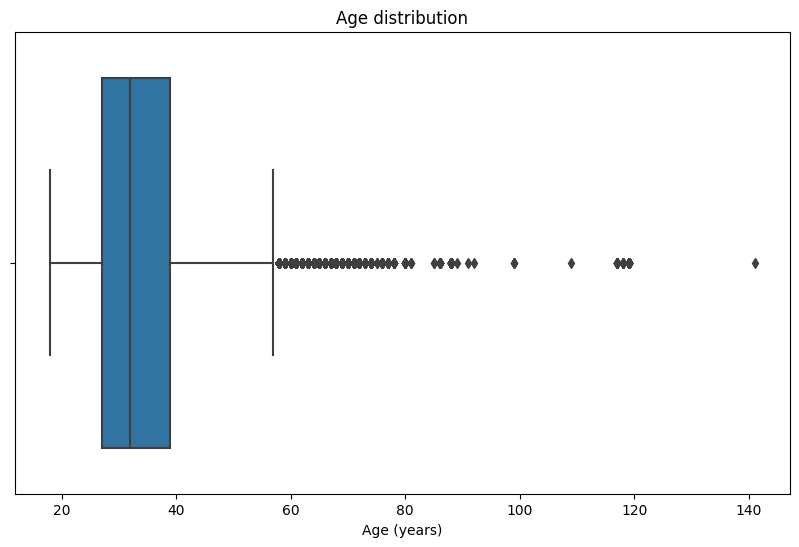

In [4]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data = bike_clean,
    x = 'member_age',
);
plt.title("Age distribution");
plt.xlabel("Age (years)");

## Time Analysis

Riders prefer taking their bike trips during the week, than on weekends. The most trips notably being taken on Thursdays, followed by Tuesdays. The least number of trips were taken on Saturdays.



In [5]:
bike_clean['start_time'] = pd.to_datetime(bike_clean['start_time'])

In [6]:
#time series data
time_df = bike_clean.groupby([pd.Grouper(key='start_time', freq='D')]).agg(unique_bikes=('bike_id', 'nunique'),
         total_bikes = ('number_of_bikes','sum'),
         total_trip_time = ('duration_sec','sum'),
         total_trip_distance = ('trip_distance', 'sum'))

# extracting a series of days of the week per row in our dataset
s = pd.date_range(bike_clean['start_time'].min(), bike_clean['start_time'].max(), freq='D').to_series()
weekdays_ser = s.dt.dayofweek

# creating a dictionary to match days in the series above which come as numbers
weekday_dict = {
    0 : 'Monday',
    1 : 'Tuesday',
    2 : 'Wednesday',
    3 : 'Thursday',
    4 : 'Friday',
    5 : 'Saturday',
    6 : 'Sunday'
}

#matching the series day numbers to actual days of the week
weekdays_list = []
for entry in weekdays_ser:
    if entry in weekday_dict.keys():
        weekdays_list.append(weekday_dict[entry])
        
#appending the weekdays to the dataframe we created earlier
time_df['weekday'] = weekdays_list

# grouping our time series dataframe by week of the day
week_day_df = time_df.groupby('weekday').agg(
    total_rentals = ('total_bikes', 'sum')
    )

week_day_df.reset_index(inplace=True)

#converting weekdays into an ordered categorical dtype
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

w_classes = pd.api.types.CategoricalDtype(ordered=True, categories=weekday_order)

week_day_df['weekday'] = week_day_df['weekday'].astype(w_classes)

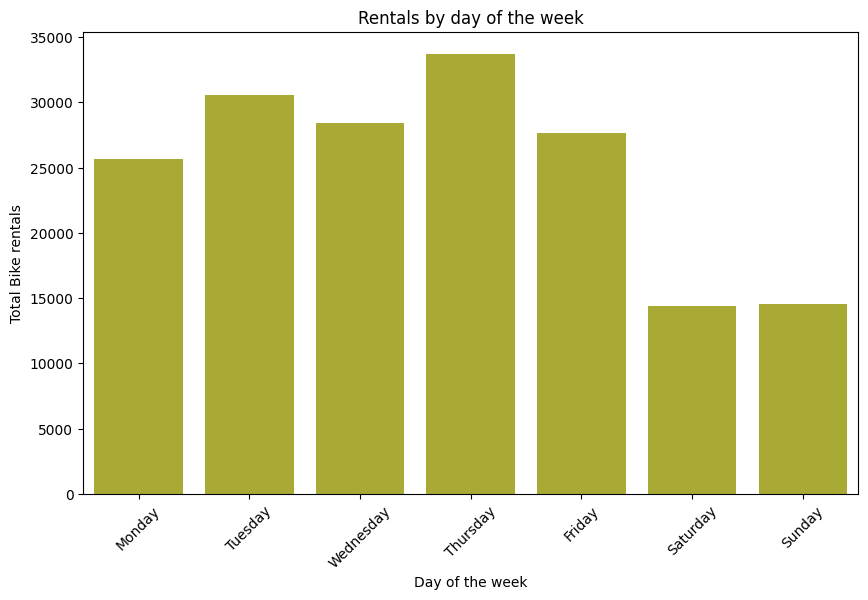

In [7]:
color = sns.color_palette()[8]
plt.figure(figsize=(10,6))
sns.barplot(
    data = week_day_df,
    x = 'weekday',
    y = 'total_rentals',
    color = color
);
plt.xticks(rotation = 45);
plt.title("Rentals by day of the week");
plt.xlabel("Day of the week");
plt.ylabel("Total Bike rentals");

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template_Hastings_Sibanda.ipynb --to slides --post serve --no-input --no-prompt